# LDA

## Sklearn

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space',
             'comp.sys.ibm.pc.hardware', 'sci.crypt']

newsgroups_train = fetch_20newsgroups(subset = 'train', categories = categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3219
#Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern = "[\w']{3,}", stop_words = 'english',
                    max_features = 2000, min_df = 5, max_df = 0.5)
review_cv = cv.fit_transform(newsgroups_train.data)

- topic_word_prior (𝛽): 토픽의 사전 단어 분포
    - 기본값 1/n_components
    - 보통 0.1
- doc_topic_prior (𝛼): 문서의 사전 토픽 분포
    - 보통 50/n_components
- learning_method
    - batch: 성능 우수, 느림
    - online

In [3]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision = 3)

lda = LatentDirichletAllocation(n_components = 10,
                               max_iter = 5,
                               topic_word_prior = 0.1, doc_topic_prior = 1.0,
                               learning_method = 'online',
                               n_jobs = -1,
                               random_state = 0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics: ', review_topics.shape)
print('#Sample of review_topics: ', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis = 0)
print('#Sum of topic weights of documents:', gross_topic_weights)
print('#shape of topic word distribution:', lda.components_.shape)

#shape of review_topics:  (3219, 10)
#Sample of review_topics:  [0.903 0.007 0.027 0.008 0.007 0.008 0.007 0.007 0.007 0.018]
#Sum of topic weights of documents: [0.087 0.083 0.085 0.115 0.115 0.126 0.098 0.072 0.07  0.148]
#shape of topic word distribution: (10, 2000)


In [6]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic #%d: ' %topic_idx, end = '')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: com, morality, keith, article, sgi, think, sandvik, objective, caltech, moral
Topic #1: image, file, graphics, files, ftp, available, software, use, data, mail
Topic #2: space, nasa, access, launch, earth, orbit, shuttle, digex, lunar, satellite
Topic #3: article, com, just, don't, like, i'm, nntp, university, host, posting
Topic #4: key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5: scsi, com, bit, ibm, bus, know, windows, thanks, card, university
Topic #6: host, gov, nntp, posting, university, distribution, nasa, ___, world, com
Topic #7: drive, com, disk, hard, controller, drives, dos, tape, floppy, problem
Topic #8: key, public, message, faq, mail, pgp, des, group, uni, ripem
Topic #9: god, people, don't, jesus, believe, just, does, say, think, know



### 최적의 토픽 수

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

n_components: 6, perplexity: 1058.260
n_components: 7, perplexity: 1055.111
n_components: 8, perplexity: 1018.328
n_components: 9, perplexity: 1017.749
n_components: 10, perplexity: 1028.686
n_components: 11, perplexity: 1033.398
n_components: 12, perplexity: 1032.112
n_components: 13, perplexity: 1038.642
n_components: 14, perplexity: 1038.627
n_components: 15, perplexity: 1044.712


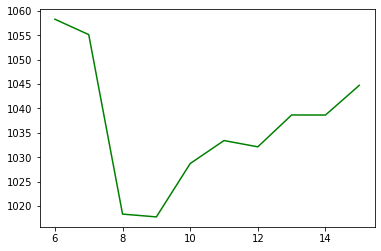

n_components with minimum perplexity:  9


In [10]:
def show_perplexity(cv, start = 10, end = 30, max_iter = 5, topic_word_prior = 0.1, doc_topic_prior = 1.0):
    iter_num = []
    per_value = []
    
    for i in range(start, end+1):
        lda = LatentDirichletAllocation(n_components = i, max_iter = max_iter,
                                       topic_word_prior = topic_word_prior,
                                       doc_topic_prior = doc_topic_prior,
                                       learning_method = 'batch', n_jobs = -1,
                                       random_state = 7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity: ",
     show_perplexity(review_cv, start = 6, end = 15))

In [11]:
lda = LatentDirichletAllocation(n_components = 9,
                               max_iter = 20,
                               topic_word_prior = 0.1,
                               doc_topic_prior = 1.0,
                               learning_method = 'batch',
                               n_jobs = -1,
                               random_state = 7)

review_topics = lda.fit_transform(review_cv)
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, available, file, ftp, mail, data, files, information, graphics, internet
Topic #1: nasa, space, gov, ___, center, orbit, earth, research, jpl, 1993
Topic #2: com, keith, morality, caltech, sgi, objective, article, think, moral, don't
Topic #3: jesus, god, just, com, know, article, john, good, don't, bible
Topic #4: people, god, don't, does, think, say, believe, just, way, evidence
Topic #5: drive, scsi, card, disk, ide, hard, controller, bus, bit, drives
Topic #6: space, access, article, year, launch, just, digex, like, henry, toronto
Topic #7: key, encryption, clipper, chip, government, com, keys, security, use, public
Topic #8: com, posting, nntp, host, university, article, i'm, know, thanks, ibm



## Gensim

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words('english')

RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts = [tokenizer(news) for news in newsgroups_train.data]

- Dictionary : 토큰화 결과로부터 id 매칭
- Dictionary.filter_extremes()
    - keep_n : max_features
    - no_below : min_df
    - no_above : max_df
- Dictionary.doc2bow() : CountVectorizer()

In [3]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(texts)
print('#Number of initial unique words in documents: ', len(dictionary))

dictionary.filter_extremes(keep_n = 2000, no_below = 5, no_above = 0.5)
print('#Number of unique words after removing rare and common words: ', len(dictionary))

corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' %len(dictionary))
print('#Number of documents: %d' %len(corpus))

#Number of initial unique words in documents:  46466
#Number of unique words after removing rare and common words:  2000
#Number of unique tokens: 2000
#Number of documents: 3219


- gensim.models.LdaModel
    - iterations : 50(default)
    - corpus : doc2bow()를 이용해 변환된 카운트 벡터 리스트
    - num_topics : 토픽의 수 (Important)
    - id2word : dictionary 의미
    - passes : sklearn의 max_iter과 동일
    - alpha : 문서의 사전 토픽 분포
        - symmetric : 모든 토픽에 대해 고정된 대칭 값 사용
        - asymmetric: 토픽들에 대해 비대칭 값 사용
        - auto : 비대칭 값을 corpus로부터 학습
    - eta : 토픽의 사전 단어 분포

In [4]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus = corpus, id2word = dictionary, \
                       passes = passes, num_topics = num_topics, \
                       random_state = 7)

CPU times: user 8.53 s, sys: 46 ms, total: 8.57 s
Wall time: 8.57 s


In [5]:
model.print_topics(num_words = 10)

[(0,
  '0.023*"com" + 0.018*"keith" + 0.016*"caltech" + 0.013*"sgi" + 0.013*"nntp" + 0.013*"posting" + 0.013*"host" + 0.012*"would" + 0.012*"system" + 0.011*"livesey"'),
 (1,
  '0.020*"morality" + 0.018*"objective" + 0.015*"one" + 0.015*"say" + 0.014*"uiuc" + 0.012*"frank" + 0.012*"values" + 0.010*"faq" + 0.010*"article" + 0.008*"cso"'),
 (2,
  '0.026*"com" + 0.025*"access" + 0.025*"posting" + 0.023*"host" + 0.023*"nntp" + 0.017*"digex" + 0.015*"article" + 0.013*"cwru" + 0.013*"___" + 0.013*"net"'),
 (3,
  '0.021*"university" + 0.017*"posting" + 0.015*"host" + 0.015*"nntp" + 0.013*"article" + 0.010*"com" + 0.009*"know" + 0.009*"i\'m" + 0.009*"would" + 0.009*"thanks"'),
 (4,
  '0.032*"com" + 0.015*"would" + 0.011*"article" + 0.010*"one" + 0.010*"get" + 0.009*"people" + 0.009*"ibm" + 0.008*"government" + 0.007*"good" + 0.007*"i\'m"'),
 (5,
  '0.025*"key" + 0.017*"encryption" + 0.014*"clipper" + 0.014*"chip" + 0.009*"keys" + 0.009*"use" + 0.008*"security" + 0.008*"government" + 0.008*"pub

In [6]:
print('#topic distribution of the first document: ', model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(0, 0.72577244), (8, 0.26994747)]


- pyLDAvis
    - λ = 1 일수록, 토픽 별로 가장 자주 등장하는 단어들을 우선적으로 키워드로 선택한다는 의미이고
    - λ = 0 일수록, 토픽 간에 차이가 많이 나는 단어를 선택한다는 의미(해당 토픽에서 많이 등장한 단어)이다.

In [8]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
a
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

/Users/mkw/opt/anaconda3/envs/serv2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/mkw/opt/anaconda3/envs/serv2/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.137200  0.040249       1        1  22.655380
5      0.065989  0.123619       2        1  14.522812
9      0.072133  0.092872       3        1  12.987425
7      0.138321  0.043608       4        1  11.020435
4     -0.021829  0.007494       5        1   9.298364
6      0.072783 -0.094710       6        1   9.118861
3      0.027374 -0.054949       7        1   8.494195
0     -0.040788 -0.129975       8        1   4.524055
2      0.005359 -0.091971       9        1   4.051838
1     -0.182144  0.063761      10        1   3.326635, topic_info=            Term         Freq        Total Category  logprob  loglift
538        space  1487.000000  1487.000000  Default  30.0000  30.0000
20           com  3752.000000  3752.000000  Default  29.0000  29.0000
834          key  1316.000000  1316.000000  Default  28.0000  28.0000
1551        scsi   741.000000   741.000000  Default  27.0000  27.0000
70       posting  1723.000000  1723.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
65        people    64.445687  1672.570874  Topic10  -5.1558   0.1469
789          sci    53.264868   309.473912  Topic10  -5.3463   1.6436
602   university    56.862632  1487.219345  Topic10  -5.2810   0.1392
294         time    55.767598  1187.715396  Topic10  -5.3004   0.3446
315       better    54.193098   564.543523  Topic10  -5.3290   1.0597

[592 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1359      1  0.006274      128
1359      2  0.069013      128
1359      3  0.037643      128
1359      4  0.878341      128
153       1  0.057463     1993
...     ...       ...      ...
343       8  0.022394    years
343       9  0.005599    years
343      10  0.121303    years
704       3  0.991487      zoo
705       3  0.984036  zoology

[2804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 8, 5, 7, 4, 1, 3, 2])

- 토픽 응집도 계산 (CoherenceModel())
    - model : 사전에 학습된 토픽 모형
    - texts : 텍스트에 대해 토큰화가 된 결과
    - corpus : 현재의 카운트 벡터
    - coherence : 응집도를 계산하는 척도 (c로 시작하는 척도들은 texts를 넘겨 줘야함, default = c_v)
        - u_mass : 가장 속도가 빠름
        - c_v
        - c_uci
        - cnpmi
    - topn : 각 토픽에서 사용할 상위 단어들의 수

1. u_mass 사용 : model, corpus
2. c ~ 사용 : model, texts

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

In [13]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model, corpus = corpus, coherence = 'u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.7493528544065975


num_topics: 6, perplexity : -7.035, coherence : -1.701
num_topics: 7, perplexity : -7.023, coherence : -1.735
num_topics: 8, perplexity : -7.023, coherence : -1.547
num_topics: 9, perplexity : -7.007, coherence : -1.891
num_topics: 10, perplexity : -6.996, coherence : -1.888
num_topics: 11, perplexity : -7.027, coherence : -2.164
num_topics: 12, perplexity : -7.019, coherence : -2.017
num_topics: 13, perplexity : -7.025, coherence : -2.255
num_topics: 14, perplexity : -7.020, coherence : -2.082
num_topics: 15, perplexity : -7.019, coherence : -2.521


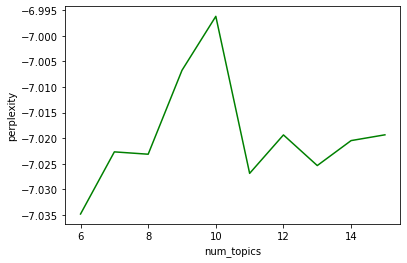

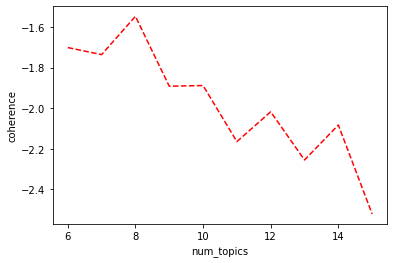

In [17]:
def show_coherence(corpus, dictioanry, start = 6, end = 15):
    iter_num = []
    per_value = []
    coh_value = []
    
    for i in range(start, end+1):
        model = LdaModel(corpus = corpus, id2word = dictioanry,
                        chunksize = 1000, num_topics = i,
                        random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model = model, corpus = corpus, coherence = 'u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity : {pv:0.3f}, coherence : {cv:0.3f}')
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel('num_topics')
    plt.ylabel('perplexity')
    plt.show()
    
    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel('num_topics')
    plt.ylabel('coherence')
    plt.show()
    
show_coherence(corpus, dictionary, start = 6, end = 15)

## 토픽의 트렌드로 시간에 따른 주제의 변화 파악

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('./petition_sampled.csv')

In [21]:
df.head()

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

In [23]:
twit = Okt()

def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

vec = CountVectorizer(tokenizer = tokenizer,
                     max_df = 0.5, min_df = 5,
                     max_features = 1000)

pet_cv = vec.fit_transform(df['content'])
print(pet_cv.shape)

(18077, 1000)


In [24]:
from sklearn.decomposition import LatentDirichletAllocation

In [25]:
lda = LatentDirichletAllocation(n_components = 15, n_jobs = -1, random_state = 0)

%time pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic #%d : ' %topic_idx, end = '')
        print(', '.join([feature_names[i] for i in topic.argsort()[:-n_top_words -1 : -1]]))

print_top_words(lda, vec.get_feature_names_out(), 15)

CPU times: user 1.97 s, sys: 400 ms, total: 2.37 s
Wall time: 12.1 s
Topic #0 : 사람, 생각, 피해자, 처벌, 사건, 병원, 가해자, 자신, 피해, 환자, 가족, 범죄, 정말, 대한, 폭행
Topic #1 : 북한, 한국, 우리, 대통령, 정부, 미국, 대한민국, 국민, 일본, 국가, 문제, 생각, 우리나라, 중국, 문재인
Topic #2 : 아이, 부모, 생각, 어린이집, 엄마, 교사, 우리, 유치원, 자녀, 가정, 동물, 가족, 저희, 출산, 아빠
Topic #3 : 청소년, 불법, 보호, 폐지, 장애인, 조직, 사찰, 게임, 생각, 이용, 소음, 사람, 나이, 사회, 노인
Topic #4 : 국민, 대통령, 정부, 나라, 정책, 주택, 부동산, 서민, 사람, 지금, 아파트, 문재인, 세금, 대한민국, 투기
Topic #5 : 일자리, 기업, 정부, 근무, 생각, 근로자, 지원, 임금, 최저임금, 정책, 시간, 직원, 사람, 고용, 대기업
Topic #6 : 국민, 청원, 국회의원, 국회, 의원, 생각, 반대, 청와대, 세금, 제도, 동의, 정치, 투표, 대통령, 국가
Topic #7 : 대한, 관리, 내용, 조사, 판결, 관련, 공사, 업무, 판사, 사실, 기관, 해당, 확인, 결과, 위원회
Topic #8 : 학생, 학교, 교육, 선수, 시험, 생각, 대학, 공부, 교사, 선생님, 문제, 시간, 고등학교, 위해, 제도
Topic #9 : 보험, 연금, 국민연금, 공무원, 지급, 방송, 국민, 소득, 가입, 의료, 보험료, 기초, 건강, 공단, 수급
Topic #10 : 여성, 공무원, 사회, 남성, 생각, 의무, 남자, 대한민국, 여자, 행정, 군대, 사람, 나라, 국가, 문제
Topic #11 : 경찰, 범죄, 국민, 위해, 대한민국, 조직, 불법, 만행, 사건, 수사, 범죄자, 부정부패, 검찰, 빨갱이, 살인마
Topic #12 : 차량, 사고, 처벌, 사건, 신고, 주차, 증거, 기사,

In [26]:
trend_data = pd.DataFrame(pet_topics, columns = ['Topic' + str(i) for i in range(1, 16)])
trend_data = pd.concat([trend_data, df['start'].map(lambda x: x[:7])], axis = 1)

In [28]:
trend_data.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,start
0,0.000307,0.000307,0.000307,0.060031,0.182109,0.000307,0.000307,0.754173,0.000307,0.000307,0.000307,0.000307,0.000307,0.000307,0.000307,2017-08
1,0.000813,0.000813,0.232351,0.000813,0.000813,0.082254,0.000813,0.000813,0.000813,0.153684,0.063374,0.000813,0.000813,0.000813,0.460206,2017-08
2,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.979710,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,2017-08
3,0.068723,0.630512,0.000227,0.000227,0.022403,0.245797,0.000227,0.000227,0.000227,0.000227,0.030297,0.000227,0.000227,0.000227,0.000227,2017-08
4,0.065132,0.401455,0.000447,0.000447,0.000447,0.036019,0.267423,0.000447,0.000447,0.000447,0.225496,0.000447,0.000447,0.000447,0.000447,2017-08


In [31]:
trend = trend_data.groupby(['start']).mean()
trend.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,,,,,,,,,,,
2017-08,0.072395,0.085190,0.155383,0.011511,0.073988,0.131014,0.033111,0.089559,0.095650,0.041555,0.031905,0.010507,0.036244,0.025885,0.106103
2017-09,0.157396,0.051371,0.088276,0.283778,0.038749,0.042630,0.051403,0.039727,0.054645,0.021613,0.042780,0.024993,0.037086,0.021294,0.044257
2017-10,0.105174,0.069594,0.065849,0.044064,0.066466,0.094951,0.053888,0.061396,0.081386,0.032258,0.089529,0.053818,0.050834,0.033566,0.097228
2017-11,0.111645,0.051717,0.043327,0.028646,0.068469,0.056141,0.093256,0.051793,0.065699,0.029746,0.046314,0.046327,0.216338,0.041019,0.049564
2017-12,0.111418,0.066582,0.067225,0.036150,0.081599,0.104353,0.082576,0.064020,0.073076,0.034563,0.056824,0.026315,0.066910,0.050224,0.078167


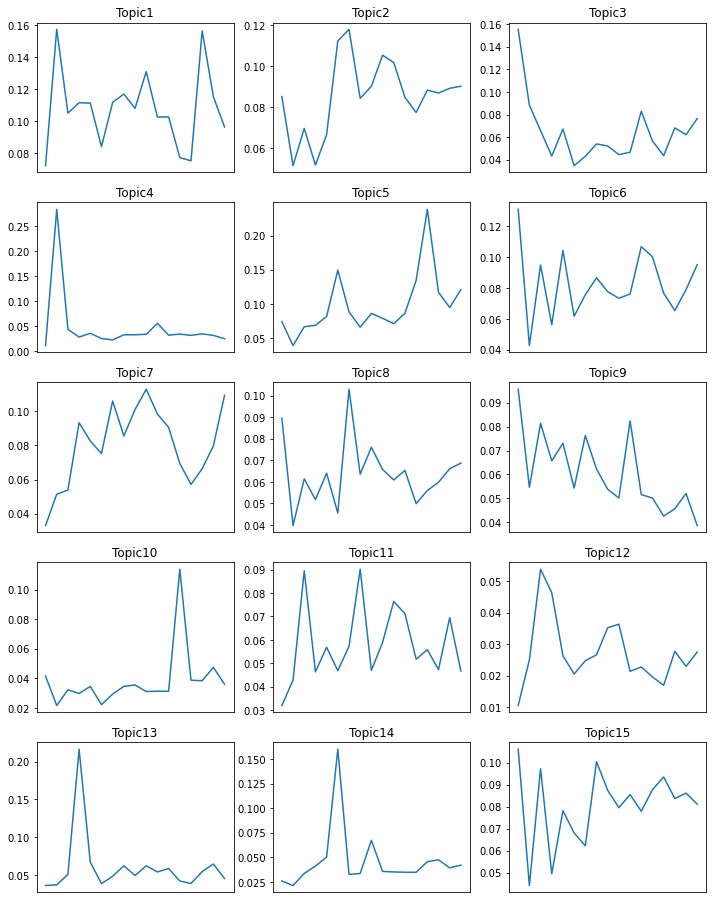

In [32]:
fig, axes = plt.subplots(5, 3, sharex = 'col', figsize = (12, 16))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()